<a href="https://colab.research.google.com/github/vigaor/Tormentas/blob/main/Google_Datos_pluvi%C3%B3metros_Municipalidad_de_Coronel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estación Municipalidad de Coronel



# Descarga y recopilación de datos en archivos excel

**Para la ejecucion de la descarga de datos, a través de un programa determinado, es necesario capacitar al personal para un correcto uso.**

**Los archivos deben ser descargados en formato .xlsx, el cual corresponde al formato de excel.**












**Los archivos en formato excel deben ser ordenados de la siguiente manera:**


1. La primera columna debe contener las fechas y horas de medición.
2. La segunda columna debe contener los registros de la precipitación. 


## **1. Formato de fecha y hora de medición**
 
 

*   En excel el formato de texto debe ser personalizado, es decir, debe agregarse de la siguiente manera: mm/dd/aa hh:mm:ss. 

**En la siguiente figura, se muestra un ejemplo sobre como debe ser el orden de los registros.**








In [ ]:
#@title Orden fecha y hora

from IPython.display import Image

# Ruta de la imagen en línea
url = "https://drive.google.com/uc?id=14XZ2BeyVp9JUNSwh__2AhBc1pEb6IyyN"

# Mostrar la imagen
Image(url=url, width=200)


## **2.   Precipitación (Registros de cada click)** 




El sistema de marcación del pluviómetro marca un click cada 0.2 mm de agua precipitada, luego, en caso que vuelva a precipitar esa misma cantidad el sistema vuleve a marcar otro click y asi sucesivamente.

El archivo excel, que contiene los datos, mostrará solo los clicks registrados. El usuario/a debe generar el intercambio según cada click a 0.2 mm.

**A continuación se presenta un ejemplo de la forma en la cual se debe desarrollar el proceso.**



In [ ]:
#@title Esta es la forma en la cual se presentan los clicks

from IPython.display import Image

# Ruta de la imagen en línea
url = "https://drive.google.com/uc?id=1qrJb9PVtfoRYJpmYVVtbeKRU9fvl1cWd"

# Mostrar la imagen
Image(url=url)


Luego de evidenciar cada click, se debe asignar el valor 0.2 a cada uno, en el caso donde no haya resgitro de ellos, es decir, cuando la celda este vacía se debe asignar el valor 0.

**A continuación, se presenta la formula, que aparece destacada en la planilla, la cual se debe insertar para realizar el proceso mencionado anteriormente.** 

In [ ]:


#@title Esta es la forma en la que se realiza el cambio de registro de click a precipitación

from IPython.display import Image

# Ruta de la imagen en línea
url = "https://drive.google.com/uc?id=1P04d2-jO9qVRfp9MLBRxttT5QBVdOklC"

# Mostrar la imagen
Image(url=url)


Luego la columna completa se copia y pega donde se está dejando el registro de la fecha y hora. Por lo tanto, como resultado se debe obtener la tabla que se muestra a continuación.

El archivo final debe ser guardado con el siguiente nombre **"Datos1".**

In [ ]:

#@title Datos agregados
from IPython.display import Image

# Ruta de la imagen en línea
url = "https://drive.google.com/uc?id=1m8izffPnFnK62RoRCk7yLbaUzX7Mcp-t"

# Mostrar la imagen
Image(url=url)


##Obtención de la precipitación acumulada mensual

In [ ]:
#@title Carga el archivo desde tu ordenador

import pandas as pd
import datetime
import numpy as np
from google.colab import files

# Cargar el archivo Excel
uploaded = files.upload()
#lee los datos con pandas para la sheet_name de excel indicado
df_nucleo=pd.read_excel('Datos Red Pluviometros.xlsx',sheet_name='Coronel')

<ipython-input-4-b56dea2b5f99>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_g=df_nucleo.groupby(by='fecha_hora_min').sum()


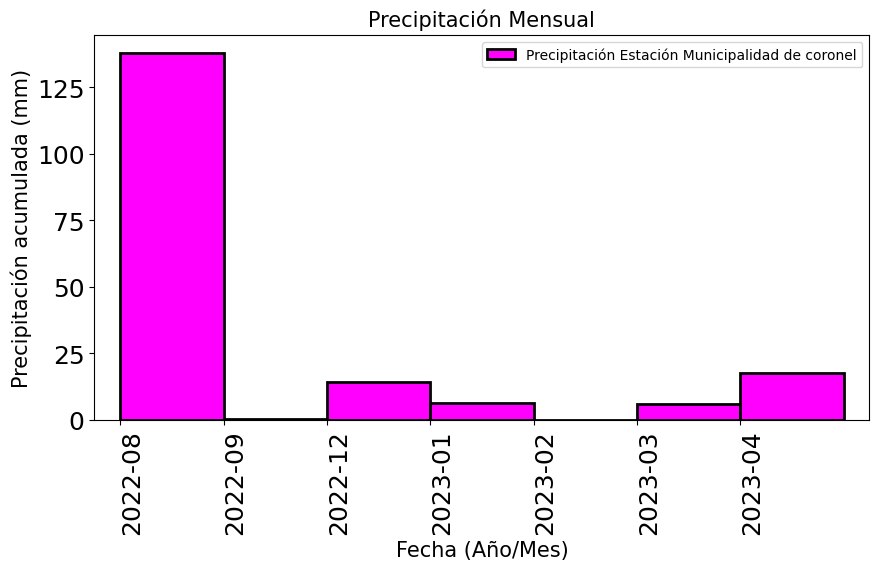

In [ ]:
#@title Precipitación Mensual

#genera el dataframe sobre la base de las fechas
df_nucleo['fe']=pd.to_datetime(df_nucleo['Fecha'])

#entrega un nuevo formato por minuto a los datos y escribe una nueva columna
df_nucleo['fecha_hora_min']=pd.to_datetime(df_nucleo.fe.dt.strftime('%m/%d/%Y %H:%M'))

#agrupa los datos por minuto
df_g=df_nucleo.groupby(by='fecha_hora_min').sum()

#Se considera como un vector los indices de la precipitacion, los cuales son las fechas
precipitacion = df_g
dt_fechas = df_g.index
dias = np.array([dt_fecha.day for dt_fecha in dt_fechas])

#Crea un vector de zeros del largo de los dias que hay en dt_fechas, es donde
#se guardaran las sumas de la precipitacion por dia
precip_dia = np.zeros(len(dias))

#Busca el indice donde el vector dia cambia de dia
cambios_de_dia = np.where(np.roll(dias, 1) != dias)[0]
fech = []
precipi = []

# Sumar la precipitación correspondiente a cada día
for i in range(len(cambios_de_dia)):
    if i == len(cambios_de_dia) - 1: # si es igual al ultimo dia
        precip_dia[cambios_de_dia[i]:] = np.sum(precipitacion[cambios_de_dia[i]:])
    else: # si es distinto al ultimo dia
        #Aqui se realiza la suma de la precipitacion desde el cambio de dia i hasta el i+1 sin tomar en cuanta el i+1
        precip_dia[cambios_de_dia[i]:cambios_de_dia[i+1]] = np.sum(precipitacion[cambios_de_dia[i]:cambios_de_dia[i+1]])
    
    
    # Agregar fecha y precipitación a las listas correspondientes, GUARDA LOS VECTORES PARA TRABAJARLOS LUEGO
    fechitas = dt_fechas[cambios_de_dia[i]].date().strftime('%m-%d-%Y')
    precipp = precip_dia[cambios_de_dia[i]]
    fech.append(fechitas)
    precipi.append(precipp)

# Imprimir la precipitación correspondiente a cada día
#for i in range(len(cambios_de_dia)):
    #print("El día", dt_fechas[cambios_de_dia[i]].date(), "se ha registrado una precipitación de", precip_dia[cambios_de_dia[i]]


#Aqui se genera la precipitacion acumulada mensual 
precipitacion = df_g #datos (precipitacion)
fechas = df_g.index #indice (fechas)

# crea una columna con el año y el mes correspondiente a cada fecha
mesaño = pd.DataFrame({'anio_mes': [dt_fecha.strftime('%Y-%m') for dt_fecha in fechas]}, index=fechas)

# usa la columna de año y mes como índice para agrupar y sumar la precipitación por mes
precip_mensual = precipitacion.groupby(mesaño['anio_mes']).sum()

import matplotlib.pyplot as plt

# crea la figura y el eje
fig, ax = plt.subplots()

# Define el tamaño de la figura
fig.set_size_inches(10, 5)


# grafica los datos en barras

precip_mensual.plot.bar(ax=ax, color='magenta', width=1, edgecolor='k',linewidth=2, align='edge',alpha = 1)
ax.set_xticklabels(precip_mensual.index, rotation=90, ha='left')

# personaliza los ejes y la leyenda
ax.legend(['Precipitación Estación Municipalidad de coronel'], fontsize=10)
ax.set_xlabel('Fecha (Año/Mes)', fontsize=15)
ax.set_ylabel('Precipitación acumulada (mm)', fontsize=15)
ax.set_title('Precipitación Mensual', fontsize=15)
ax.tick_params(axis='both', labelsize=18)

In [ ]:
#@title Precipitación Diaria 

# Crea la figura con el tamaño deseado
fig = plt.figure(figsize=(15, 5))

# Crea el gráfico de barras
plt.bar(range(len(precipi)), precipi, color='magenta')

# Modifica las etiquetas del eje x para mostrar solo cada 10 días
fech_10d = [fech[i] if i % 10 == 0 else "" for i in range(len(fech))]
plt.xticks(range(len(fech)), fech_10d, rotation=90, ha="right")

# Agrega etiquetas a los ejes y título al gráfico
plt.legend(['Precipitación Estación Municipalidad de Coronel'], fontsize=15)

plt.xlabel('Fechas (Mes/Día/Año)', fontsize = 15)


plt.ylabel('Precipitación acumulada (mm)', fontsize = 15)
plt.title('Precipitación Diaria', fontsize = 20)
plt.tick_params(axis='both', labelsize=15)
# Muestra el gráfico
plt.tight_layout()



maxindice = np.argmax(precip_dia[cambios_de_dia])
max_precip_fecha = dt_fechas[cambios_de_dia[maxindice]].date().strftime('%m-%d-%Y')
#print('La fecha con mayor preciptiación fue el', max_precip_fecha, 'con',np.round(precip_dia.max(),4),'mm de agua precipitada.')
# LA FECHA: MES/DIA/AÑO

In [ ]:
#@title Inserte archivo que contiene cada tormenta 
import pandas as pd
import datetime
import numpy as np
from google.colab import files

# Cargar el archivo Excel
uploaded = files.upload()

Saving Datos 15-16 de agosto 2022.xlsx to Datos 15-16 de agosto 2022.xlsx


<ipython-input-8-43f416f8526d>:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_g=df_nucleo.groupby(by='fecha_hora_min').sum()


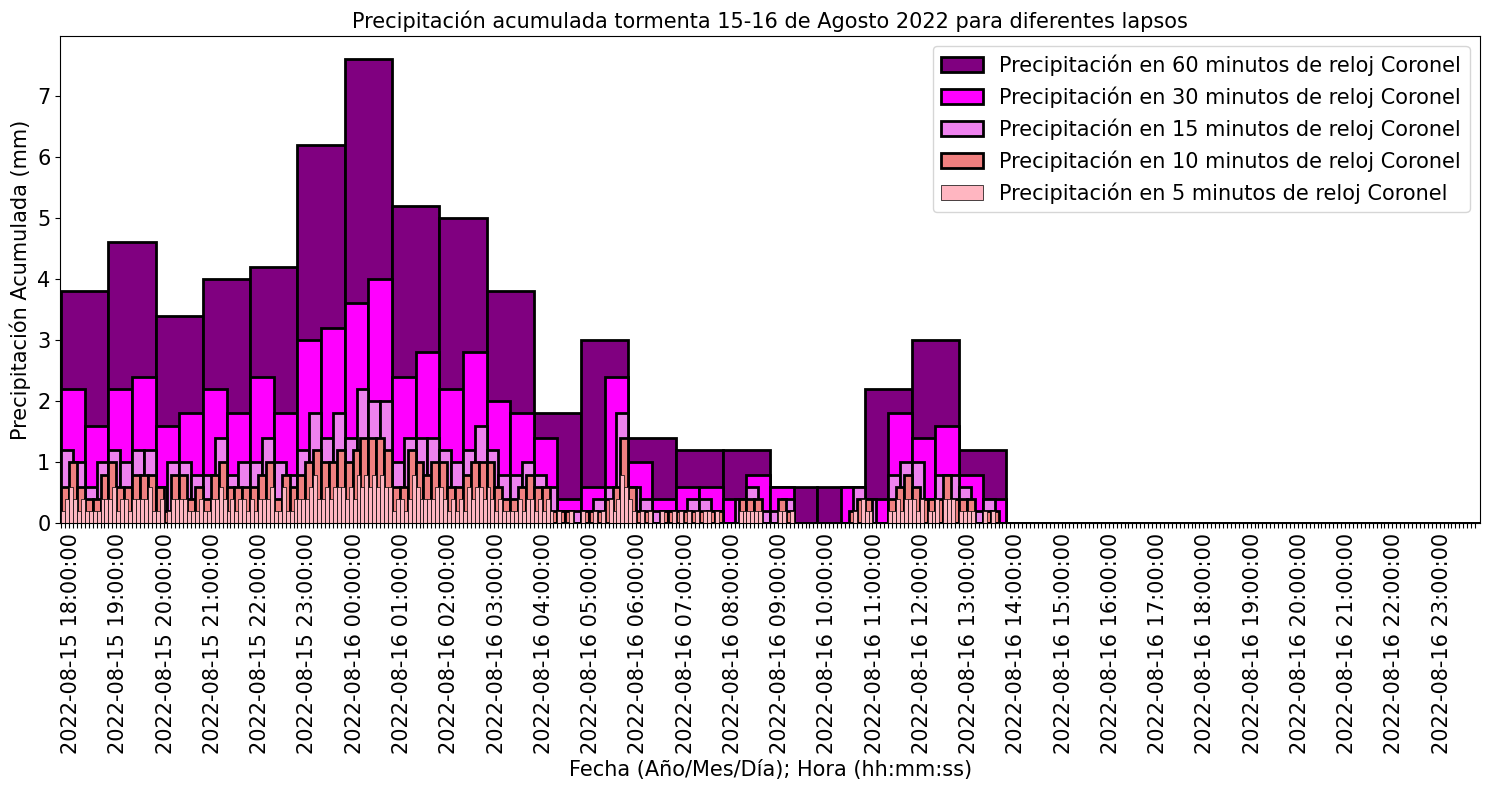

In [ ]:
#@title Variación temporal de la Precipitación Acumulada (mm) 6 de Agosto 2022
import pandas as pd
import datetime
import numpy as np
from google.colab import files
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

#lee los datos con pandas para la sheet_name de excel indicado
df_nucleo=pd.read_excel('Datos 15-16 de agosto 2022.xlsx',sheet_name='Coronel')

#genera el dataframe sobre la base de las fechas
df_nucleo['fe']=pd.to_datetime(df_nucleo['Fecha y Hora'])

#entrega un nuevo formato por minuto a los datos y escribe una nueva columna
df_nucleo['fecha_hora_min']=pd.to_datetime(df_nucleo.fe.dt.strftime('%m/%d/%Y %H:%M'))

#agrupa los datos por minuto
df_g=df_nucleo.groupby(by='fecha_hora_min').sum()

# Agrupar los datos en intervalos de 15, 30 y 60 minutos y suma los valores de cada grupo

df_5min = df_g.resample('5T').sum()
df_10min = df_g.resample('10T').sum()
df_15min = df_g.resample('15T').sum()
df_30min = df_g.resample('30T' ).sum()
df_60min = df_g.resample('60T').sum()

#GRÁFICA
#Deja en la misma escala todos los registros
df_10min0 = df_10min.reindex(df_5min.index)
df_15min0 = df_15min.reindex(df_5min.index)
df_30min0 = df_30min.reindex(df_5min.index)
df_60min0 = df_60min.reindex(df_5min.index)
# Modifica las etiquetas del eje x para mostrar solo cada 60 minutos la fecha y hora
etiquetas_x = [df_5min.index[i] if i % 12 == 0 else "" for i in range(len(df_5min.index))]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
df_60min0.plot.bar(ax=ax, color='purple', width=12, edgecolor='k',linewidth=2, align='edge',alpha = 1)
df_30min0.plot.bar(ax=ax, color='magenta', width=6, edgecolor='k',linewidth=2, align='edge',alpha = 1)
df_15min0.plot.bar(ax=ax, color='violet', width=3, edgecolor='k',linewidth=2, align='edge',alpha = 1)
df_10min0.plot.bar(ax=ax, color='lightcoral', width=2, edgecolor='k',linewidth=2, align='edge',alpha = 1)
df_5min.plot.bar(ax=ax, color='lightpink', width=1, edgecolor='k',linewidth=0.5, align='edge',alpha = 1)
ax.set_xticklabels(etiquetas_x, rotation=90, ha='left')
plt.legend(["Precipitación en 60 minutos de reloj Coronel","Precipitación en 30 minutos de reloj Coronel", "Precipitación en 15 minutos de reloj Coronel","Precipitación en 10 minutos de reloj Coronel", "Precipitación en 5 minutos de reloj Coronel"], prop={'size': 15})
ax.set_xlabel('Fecha (Año/Mes/Día); Hora (hh:mm:ss)', fontsize=15)
ax.set_ylabel('Precipitación Acumulada (mm)', fontsize=15)
ax.set_title('Precipitación acumulada tormenta 15-16 de Agosto 2022 para diferentes lapsos', fontsize=15)

ax.tick_params(axis='both', labelsize=15)
plt.tight_layout()
plt.show()

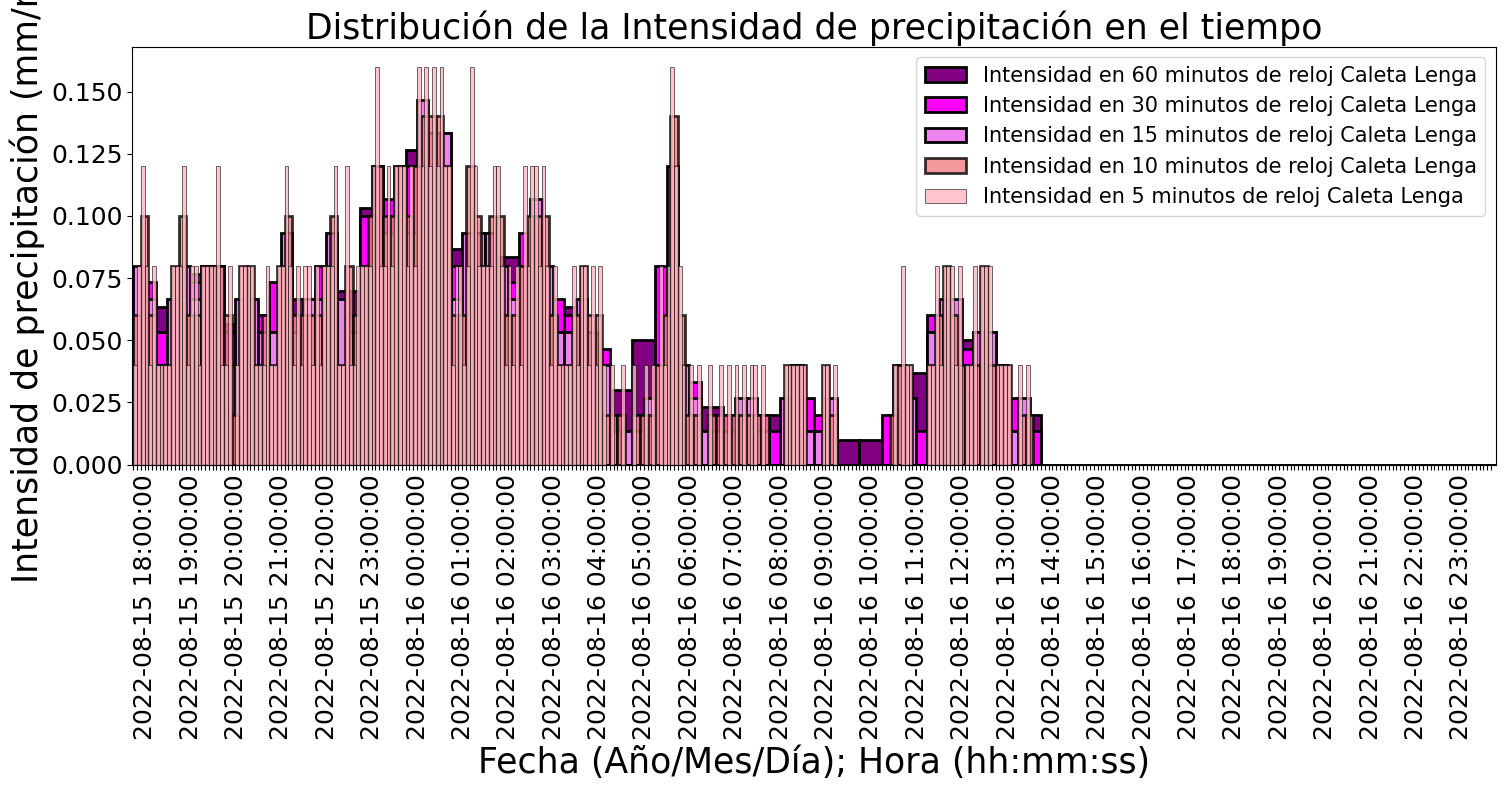

In [ ]:

#@title Variación temporal de la Intensidad de Precipitación (mm/min) 6 de Agosto 2022


#GRÁFICA
#Deja en la misma escala todos los registros


df_5min = df_g.resample('5T').sum()/5
df_10min = df_g.resample('10T').sum()/10
df_15min = df_g.resample('15T').sum()/15
df_30min = df_g.resample('30T' ).sum()/30
df_60min = df_g.resample('60T').sum()/60
df_10min0 = df_10min.reindex(df_5min.index)
df_15min0 = df_15min.reindex(df_5min.index)
df_30min0 = df_30min.reindex(df_5min.index)
df_60min0 = df_60min.reindex(df_5min.index)

# Modifica las etiquetas del eje x para mostrar solo cada 60 minutos la fecha y hora
etiquetas_x = [df_5min.index[i] if i % 12 == 0 else "" for i in range(len(df_5min.index))]
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
df_60min0.plot.bar(ax=ax, color='purple', width=12, edgecolor='k',linewidth=2, align='edge',alpha = 1)
df_30min0.plot.bar(ax=ax, color='magenta', width=6, edgecolor='k',linewidth=2, align='edge',alpha = 1)
df_15min0.plot.bar(ax=ax, color='violet', width=3, edgecolor='k',linewidth=2, align='edge',alpha = 1)
df_10min0.plot.bar(ax=ax, color='lightcoral', width=2, edgecolor='k',linewidth=2, align='edge',alpha = 0.8)
df_5min.plot.bar(ax=ax, color='lightpink', width=1, edgecolor='k',linewidth=0.5, align='edge',alpha = 0.8)
ax.set_xticklabels(etiquetas_x, rotation=90, ha='left')
plt.legend(["Intensidad en 60 minutos de reloj Coronel","Intensidad en 30 minutos de reloj Coronel", "Intensidad en 15 minutos de reloj Coronel", "Intensidad en 10 minutos de reloj Coronel","Intensidad en 5 minutos de reloj Coronel"], prop={'size': 15})
ax.set_xlabel('Fecha (Año/Mes/Día); Hora (hh:mm:ss)', fontsize=25)
ax.set_ylabel('Intensidad de precipitación (mm/min)', fontsize=25)
ax.set_title('Distribución de la Intensidad de precipitación en el tiempo', fontsize=25)
ax.tick_params(axis='both', labelsize=18)

plt.tight_layout()
plt.savefig('ventana fija intensidad 15-16 de Agosto 2022 Caleta Lenga.png',dpi=900, transparent = False)

### Se puede comprobar la diferencias en el calculo de las intensidades. A través del siguiente gráfico se puede evidenciar que las intensidades de precipitación son mayores obtenidas en ventanas móviles a que en ventanas en tiempo reloj.

<ipython-input-15-838dd4fd24c6>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_g=df_nucleo.groupby(by='fecha_hora_min').sum()
<ipython-input-15-838dd4fd24c6>:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_g0=df_nucleo0.groupby(by='fecha_hora_min').sum()


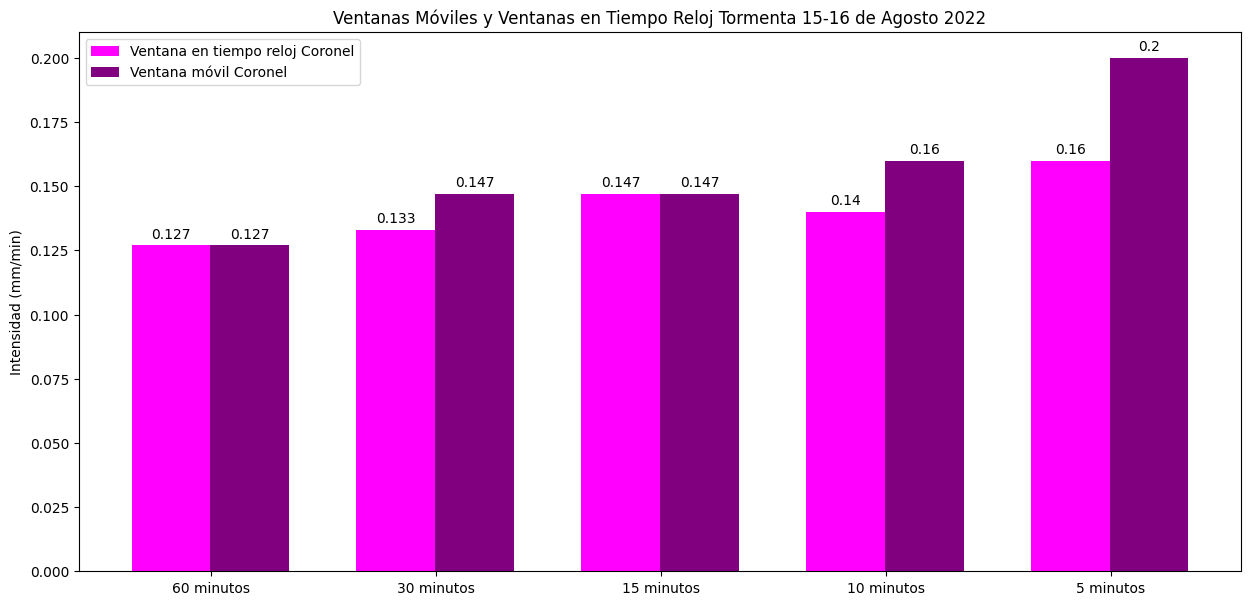

In [ ]:
#@title Comparación ventana móvil versus ventana en tiempo reloj
#lee los datos con pandas para la sheet_name de excel indicado

#lee los datos con pandas para la sheet_name de excel indicado
df_nucleo=pd.read_excel('Datos 15-16 de agosto 2022.xlsx',sheet_name='Coronel')
#genera el dataframe sobre la base de las fechas
df_nucleo['fe']=pd.to_datetime(df_nucleo['Fecha y Hora'])

#entrega un nuevo formato por minuto a los datos y escribe una nueva columna
df_nucleo['fecha_hora_min']=pd.to_datetime(df_nucleo.fe.dt.strftime('%m/%d/%Y %H:%M'))

#agrupa los datos por minuto
df_g=df_nucleo.groupby(by='fecha_hora_min').sum()

# Agrupar los datos en intervalos de 15, 30 y 60 minutos y suma los valores de cada grupo

df_5min = df_g.resample('5T').sum()
df_10min = df_g.resample('10T').sum()
df_15min = df_g.resample('15T').sum()
df_30min = df_g.resample('30T' ).sum()
df_60min = df_g.resample('60T').sum()

#Intesidad maxima

df_60min = df_g.resample('60T').sum()/60
df_30min = df_g.resample('30T').sum()/30
df_15min = df_g.resample('15T').sum()/15
df_10min = df_g.resample('10T' ).sum()/10
df_5min = df_g.resample('5T').sum()/5


df_nucleo0=pd.read_excel('Datos 15-16 de agosto 2022.xlsx',sheet_name='Coronel')


#genera el dataframe sobre la base de las fechas
df_nucleo0['fe']=pd.to_datetime(df_nucleo0['Fecha y Hora'])

#entrega un nuevo formato por minuto a los datos y escribe una nueva columna
df_nucleo0['fecha_hora_min']=pd.to_datetime(df_nucleo0.fe.dt.strftime('%m/%d/%Y %H:%M'))

#agrupa los datos por minuto
df_g0=df_nucleo0.groupby(by='fecha_hora_min').sum()
#genera filas para cada minuto del rango de datos
r = pd.date_range(start=df_g0.index.min(),end=df_g0.index.max(),freq='min')

#asigna una pp nula a las fechas (minutos) ingresados y reordena incluyendo las fechas con datos
df_g0=df_g0.reindex(r).fillna(0.0)

#define el rango de filas en las que se agregan los datos
#en este caso '%d/%m/%y %H:%M' cada fila corresponde a un minuto
#puesto se han rellenado los tiempos (minutos) faltantes
#Para UCSC los registros estan cada 5 minutos por defecto
# el resto de las estaciones debo pasarlas a minutos por la incertesa que no se sabe cada cuando rato se registraron datos
filas_min0= 60
filas_min1= 30
filas_min2= 15
filas_min3= 10
filas_min4= 5

#suma el numero de filas definidas (minutos) en una ventana movil con paso de 1 minuto (1 fila)
df_x1=df_g0.rolling(filas_min0).sum()
df_x2=df_g0.rolling(filas_min1).sum()
df_x3=df_g0.rolling(filas_min2).sum()
df_x4=df_g0.rolling(filas_min3).sum()
df_x5=df_g0.rolling(filas_min4).sum()

#Intesidad

intensidad1 = df_x1.max()/60
intensidad2 = df_x2.max()/30
intensidad3 = df_x3.max()/15
intensidad4 = df_x4.max()/10
intensidad5 = df_x5.max()/5

#Armando matriz de datos

minutos = np.array([60,30,15,10,5])
ventanafija = np.array([df_60min.max(),df_30min.max(),df_15min.max(),df_10min.max(),df_5min.max()])
ventanamovil = np.array([intensidad1,intensidad2,intensidad3,intensidad4,intensidad5])
Min = minutos.flatten(order='A')
VenFi = ventanafija.flatten(order='A')
VenMo = ventanamovil.flatten(order='A')

venfija = np.round(VenFi,3)
venmovil = np.round(VenMo,3)

Mat = pd.DataFrame({'Minutos': Min,'Ventana Fija': venfija,'Ventana Movil': venmovil})

#Venta Movil y fija

Data =  np.array(Mat.iloc[:,[1,2]].values.tolist())
Fija = Data[:,0] 
Movil = Data[:,1]
#Eje x debes graficar la fecha en la que ocurren los maximos

# Crear el gráfico
x = np.arange(len(venmovil))
width = 0.35

fig, ax = plt.subplots(figsize=(15, 7))
rects1 = ax.bar(x - width/2, Fija, width, label='Ventana en tiempo reloj Coronel',color= 'magenta')
rects2 = ax.bar(x + width/2, Movil, width, label='Ventana móvil Coronel', color= 'purple')

ax.set_ylabel('Intensidad (mm/min)')
ax.set_title('Ventanas Móviles y Ventanas en Tiempo Reloj Tormenta 15-16 de Agosto 2022')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend()
#ax.legend(fontsize='9')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Desplazamiento de etiqueta
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
# Mostrar el gráfico
plt.xticks([r+width/100 for r in range(len(venmovil))],
        ['60 minutos', '30 minutos', '15 minutos', '10 minutos', '5 minutos'])
plt.show()

In [ ]:
#@title Variacioón de la Intesidad de precipitación, obtenida a partir de ventanas móviles, en el espacio.


